Overview:
    
- In building a news detector, two intuitive considerations can be made to optimize the model accuracy. This model focuses on maximing the vectorization of the input data set.

- Using a countVectorizer for news dataset that have similar news articles. Intuitively, it means if more similar news article are found int the dataset, it is more likely these news article will be valid or false depending on the majorty label

- The TFIDF works better in a dataset that has alot of unique news article as it is able to highlight the weight of these uniue words

### Brief description of the data :

Data Description:
    Here the data given is all about the news and we need to find out whether the data is fake or real.
    we have four  input feature and one output feature which is telling that data is real or fake.
Feature info: 

1. id: unique id for a news article.
2. title: the title of the news article.
3. author: author of the news article.
4. text: the text of the article that could be incomplete.
5. label: a label that marks whether the news article is real or fake.

            1 => fake news
            0 => real news

In [ ]:
## Importing required  Libraries

In [387]:
# Importing Libraries
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sadha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sadha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Preparation:

### Get the data which we want to train and test

In [388]:
train_data = pd.read_csv("train.csv")

In [389]:
train_data.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


## EDA : Exploratory Data Analysis

#### Displaying rows and columns in dataset

In [390]:
# Displaying rows and columns in dataset
print("There are {} number of rows and {} number of columns for training.".format(train_data.shape[0],train_data.shape[1]))

There are 20800 number of rows and 5 number of columns for training.


#### Checking the null values in training data.

In [391]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

#### Checking the null values in testing data.

In [392]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


#### Describing the data

In [393]:
train_data.describe(include="object")

,title,author,text
count,20242,18843,20761
unique,19803,4201,20386
top,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,
freq,5,243,75


#### Check if duplicated record is there

In [394]:
train_data[train_data.duplicated()]

,id,title,author,text,label


In [395]:
train_data[train_data['author']=='Anonymous'].head(3)

,id,title,author,text,label
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
347,347,LesserOfTwoEvilism,Anonymous,2016 presidential campaign by Matt Sedillo \nH...,1


In [396]:
train_data[(train_data['author']=='Anonymous') & (train_data['label']==1)]

,id,title,author,text,label
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
347,347,LesserOfTwoEvilism,Anonymous,2016 presidential campaign by Matt Sedillo \nH...,1
376,376,Realities Faced by Black Canadians are a Natio...,Anonymous,"Tweet Widget by Robyn Maynard \nCanada, includ...",1
562,562,NaN,Anonymous,Field is correct about the 8a companies and Tr...,1
...,...,...,...,...,...
18720,18720,NaN,Anonymous,There is plenty of proof the machines are rigg...,1
18903,18903,NaN,Anonymous,"There are lots of diiferent truths , when i he...",1
19171,19171,NaN,Anonymous,"Same people all the time , i dont know how you...",1
20142,20142,The Deteriorating Situation in Ethiopia,Anonymous,Tweet Widget by Yohannes Woldemariam \nThe min...,1


#### Insights : There are 77 rows which are with autor 'Anonymous' and alll records belongs to label 1 i.e fake news. 


In [397]:
train_data[train_data['title'].isnull()]

,id,title,author,text,label
53,53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
124,124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
196,196,NaN,Raffie,They got the heater turned up on high.,1
...,...,...,...,...,...
20568,20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1
20636,20636,NaN,Dave Lowery,Trump all the way!,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1


### Insights:There are 558 records with no title

In [398]:
train_data[(train_data['title'].isnull()) & (train_data['label']==1)]

,id,title,author,text,label
53,53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
124,124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
196,196,NaN,Raffie,They got the heater turned up on high.,1
...,...,...,...,...,...
20568,20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1
20636,20636,NaN,Dave Lowery,Trump all the way!,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1


### Insights:There are 558 records with no title and all belong to label 1 that is with fake news

In [399]:
train_data[train_data['author'].isnull()]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20718,20718,This Is The Best Picture In Human History | Da...,NaN,This Is The Best Picture In Human History By: ...,1
20728,20728,Trump warns of World War III if Clinton is ele...,NaN,Email Donald Trump warned in an interview Tues...,1
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1


### Insights :There are 1957 records with the feature 'author' with no value

In [400]:
train_data[(train_data['author'].isnull()) & (train_data['label']==1)]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
43,43,Can I have one girlfriend without you bastards...,NaN,Can I have one girlfriend without you bastards...,1
...,...,...,...,...,...
20718,20718,This Is The Best Picture In Human History | Da...,NaN,This Is The Best Picture In Human History By: ...,1
20728,20728,Trump warns of World War III if Clinton is ele...,NaN,Email Donald Trump warned in an interview Tues...,1
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1


### Insights : From the 1957 records with  'author' with no value  mostly 1931 belong to the label 1 that means those all are fake records.

In [401]:
train_data.groupby(train_data['author'])['label'].sum()

author
# 1 NWO Hatr                                                                                                              17
-NO AUTHOR-                                                                                                               54
10 Habits That Will Make Your Life Easier &amp; More Peaceful - Wellness Solutions                                         1
10 More Beautiful Images That Remind You We Still Live In A Beautiful World, With Beautiful People - Upside Down Media     1
10 Movies That Could Change Your Understanding Of Life - Upside Down Media                                                 1
                                                                                                                          ..
تييري ميسان                                                                                                                1
جنگ ارزی آمریکا علیه ایران / مورد مطالعاتی سال 1390 - کدآمایی                                                         

### Insights : many label belongs to 'NO Author' 

In [402]:
train_data[(train_data['author'] == '# 1 NWO Hatr') & (train_data['label'] == 1)].count()

id        17
title     17
author    17
text      17
label     17
dtype: int64

### Insights : Total 17 entries with author '# 1 NWO Hatr' which has label 1 means fake news

In [403]:
train_data[(train_data['author'] == '-NO AUTHOR-')].count()

id        54
title     54
author    54
text      54
label     54
dtype: int64

In [404]:
train_data[(train_data['author'] == '-NO AUTHOR-') & (train_data['label'] == 1)].count()

id        54
title     54
author    54
text      54
label     54
dtype: int64

### Insights : Total 54 entries with author '-NO AUTHOR-' which has label 1 means fake news

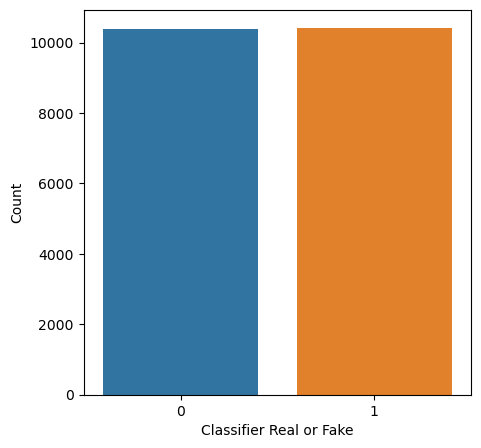

In [405]:
# Visualizing the count of 'Label' column from the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot(x='label', data=train_data)
plt.xlabel('Classifier Real or Fake')
plt.ylabel('Count')
plt.show()

### Insights: Both real and fake values are same

## Data Preprocessing 

## Handling Missing Values

In [406]:
#Input: Data to the function containing Nan values.
#Output : Cleaned data containing no Nan values.
#Function: Cleaning Nan values.
def handle_missing_value(train_data):
    train_data = train_data.fillna(" ")
    return train_data

train = handle_missing_value(train_data)

In [373]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [374]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


### Check Data has imbalanced set or not

In [407]:
train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [408]:
imbalanced_count = (train[train['label']==1].label.count())-(train[train['label']==0].label.count())

In [409]:
print(imbalanced_count)

26


## Creating a variable "title_author" by merging columns "title" and "author"

In [410]:
train["title_author"] = train["title"]+" "+train["author"]

In [411]:
train.head(3)

,id,title,author,text,label,title_author
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...


## stemming and Data Cleaning

- Stemming: This is the process of reducing the words into roots words and that will remove suffix and prefix from the word.

Steps are followed:
1. Firstly, all the sequences except english characters are removed from the string. 
2. Next, to avoid false predictions or ambiguity with upper and lowercase, all the characters in strings are converted to lowercase. 
3. Next, all the sentences are tokenized into words. 
4. To facilitate fast processing, stemming is applied to the tokenized words.
5. Next, words are joined together and stored in the corpus.

Note: In this tutorial, we have used "merged" column for classification task. Also, the loop inside the function runs over all the examples in the merged column.

In [412]:
port=PorterStemmer()
def stem_data(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [421]:
train['title_author']=train['title_author'].apply(stem_data)

In [422]:
# seperating the data and label
X = train['title_author'].values
y = train['label'].values

## Train Test spit with Countvectorizer

In [ ]:
# train test split
cv = CountVectorizer(ngram_range =(2,2), max_features = 20000)
X_cv= cv.fit_transform(X).toarray() # matrix creation- words as columns, sentences as rows
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cv,y, test_size =0.32, random_state =10,stratify=y)

## Train Test split with TF-IDF vectorizer

In [ ]:
# train test split
tfidf = TfidfVectorizer(ngram_range =(2,2), max_features = 20000)
X_tf = tfidf.fit_transform(X).toarray() # matrix creation- words as columns, sentences as rows
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size =0.25, random_state =0,stratify=y)

### Function to get all value with resepct to called machine algo by using Countvectorizer train test split

In [316]:
def train(model, model_name):
    model.fit(X_train1,y_train1)
    print(f"Training accuracy of {model_name} is {model.score(X_train1,y_train1)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test1,y_test1)}")
    y_pred1 = model.predict(X_test1)
    print(confusion_matrix(y_test1, y_pred1))
    print(classification_report(y_test1,y_pred1))
    accuracy= accuracy_score(y_test1, y_pred1)
    return accuracy

### Function to get all value with resepct to called machine algo by using TF-IDF vecorrizer train test split

In [317]:
def train_tfidf(model, model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    accuracy= accuracy_score(y_test, y_pred)
    return accuracy

## 1. Countvectorizer : LogisticRegression

In [318]:
model1_accuracy = train(LogisticRegression(),'LogisticRegression')

Training accuracy of LogisticRegression is 0.9959615384615385
testing accuracy of LogisticRegression is 0.9901923076923077
[[2552   45]
 [   6 2597]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2597
           1       0.98      1.00      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



In [302]:
print("Accuracy of Logistic Regression on Count Vectorizer data",model1_accuracy*100)

Accuracy of Logistic Regression on Count Vectorizer data 99.01923076923077


## 2. Countvectorizer : MultinomialNB

In [337]:
model2_accuracy = train(MultinomialNB(),'MultinomialNB')

Training accuracy of MultinomialNB is 0.9916025641025641
testing accuracy of MultinomialNB is 0.9738461538461538
[[2585   12]
 [ 124 2479]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2597
           1       1.00      0.95      0.97      2603

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



In [426]:
print("Accuracy of Multinomial NB on Count Vectorizer data",model2_accuracy*100)

Accuracy of Multinomial NB on Count Vectorizer data 97.38461538461539


## 3. Countvectorizer : DecisionTreeClassifier

In [338]:
model3_accuracy = train(DecisionTreeClassifier(),'DecisionTreeClassifier')

Training accuracy of DecisionTreeClassifier is 0.9999358974358974
testing accuracy of DecisionTreeClassifier is 0.9930769230769231
[[2575   22]
 [  14 2589]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2597
           1       0.99      0.99      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



In [425]:
print("Accuracy of DecisionTree on Count Vectorizer data",model3_accuracy*100)

Accuracy of DecisionTree on Count Vectorizer data 99.3076923076923


## 4.Countvectorize : XGBoost Classifier

In [307]:
model4_accuracy = train(XGBClassifier(),'XGBoostClassifier')

Training accuracy of XGBoostClassifier is 0.9892948717948717
testing accuracy of XGBoostClassifier is 0.9875
[[2537   60]
 [   5 2598]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2597
           1       0.98      1.00      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200

Accuracy of Logistic Regression on Count Vectorizer data 98.75


In [427]:
print("Accuracy of XGboost on Count Vectorizer data",model4_accuracy*100)

Accuracy of XGboost on Count Vectorizer data 98.75


In [333]:
results = pd.DataFrame([["Logistic Regression",model1_accuracy],["Naive Bayes",model2_accuracy],["Decision Tree",model3_accuracy],
                      ["XGBOOST",model4_accuracy]],columns=["Model","Accuracy"])

results

,Model,Accuracy
0,Logistic Regression,0.980385
1,Naive Bayes,0.973269
2,Decision Tree,0.993462
3,XGBOOST,0.987500


## 1. TF-IDF vectorizer :LogisticRegression

In [336]:
model1_accuracy_tfidf = train_tfidf(LogisticRegression(),'LogisticRegression')

Training accuracy of LogisticRegression is 0.9905128205128205
testing accuracy of LogisticRegression is 0.9803846153846154
[[2501   96]
 [   6 2597]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2597
           1       0.96      1.00      0.98      2603

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



In [428]:
print("Accuracy of Logistic Regression on TF-IDF data",model1_accuracy_tfidf*100)

Accuracy of Logistic Regression on TF-IDF data 98.03846153846155


## 2. TF-IDF vectorizer :MultinomialNB

In [341]:
model2_accuracy_tfidf = train_tfidf(MultinomialNB(),'MultinomialNB')

Training accuracy of MultinomialNB is 0.9930769230769231
testing accuracy of MultinomialNB is 0.9732692307692308
[[2586   11]
 [ 128 2475]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2597
           1       1.00      0.95      0.97      2603

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



In [429]:
print("Accuracy of Naive Bayes MultiNB on TF-IDF data",model2_accuracy_tfidf*100)

Accuracy of Naive Bayes MultiNB on TF-IDF data 97.32692307692308


## 3. TF-IDF vectorizer : DecisionTreeClassifier

In [339]:
model3_accuracy_tfidf = train_tfidf(DecisionTreeClassifier(),'DecisionTreeClassifier')

Training accuracy of DecisionTreeClassifier is 0.9999358974358974
testing accuracy of DecisionTreeClassifier is 0.9940384615384615
[[2576   21]
 [  10 2593]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2597
           1       0.99      1.00      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



In [430]:
print("Accuracy of DecisionTree classifier on TF-IDF data",model3_accuracy_tfidf*100)

Accuracy of DecisionTree classifier on TF-IDF data 99.40384615384616


## 4.TF-IDF vectorizer : XGBoost Classifier

In [340]:
model4_accuracy_tfidf = train_tfidf(XGBClassifier(),'XGBoostClassifier')

Training accuracy of XGBoostClassifier is 0.989423076923077
testing accuracy of XGBoostClassifier is 0.9875
[[2537   60]
 [   5 2598]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2597
           1       0.98      1.00      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



In [431]:
print("Accuracy of XGB classifier on TF-IDF data",model4_accuracy_tfidf*100)

Accuracy of XGB classifier on TF-IDF data 98.75


In [343]:
results_tfidf = pd.DataFrame([["Logistic Regression_tfidf",model1_accuracy],["Naive Bayes_tfidf",model2_accuracy],["Decision Tree_tfidf",model3_accuracy],
                      ["XGBOOST_tfidf",model4_accuracy]],columns=["Model","Accuracy"])
results_tfidf

,Model,Accuracy
0,Logistic Regression_tfidf,0.980385
1,Naive Bayes_tfidf,0.973846
2,Decision Tree_tfidf,0.993077
3,XGBOOST_tfidf,0.987500
